### Load tensorflow

In [42]:
import tensorflow as tf

### Collect Data

In [43]:
# https://www.kaggle.com/uciml/pima-indians-diabetes-database
import pandas as pd
demo = pd.read_csv("iris.csv")
demo.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [44]:
X=demo.drop('variety',axis=1)
y=demo['variety']
demo.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


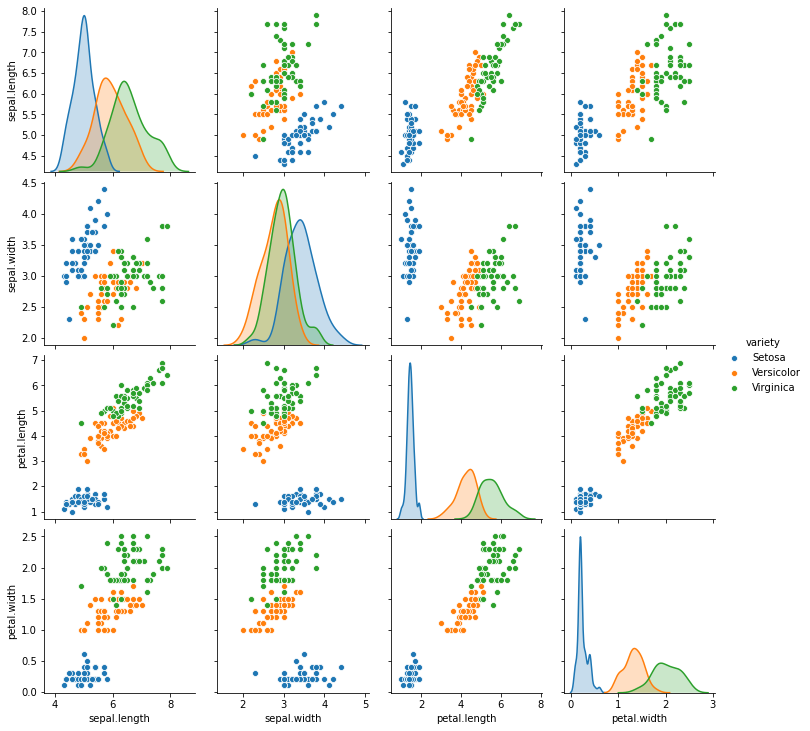

In [45]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(demo,diag_kind='kde',hue="variety")

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)

In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

## Build the Graph

In [48]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((4,),input_shape=(4,)))
model.add(tf.keras.layers.BatchNormalization())

In [49]:
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(3, activation='softmax'))

## Build the Graph...

In [58]:
#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.1)

#Compile the model
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

## Train the model

In [60]:
model.fit(X_train,y_train,          
          validation_data=(X_test,y_test),
          epochs=20,
          batch_size=32)

Epoch 1/20
4/4 [==============================] - 0s 8ms/step - loss: 0.0936 - accuracy: 0.9667 - val_loss: 0.0754 - val_accuracy: 0.9667
Epoch 2/20
4/4 [==============================] - 0s 9ms/step - loss: 0.0840 - accuracy: 0.9750 - val_loss: 0.0738 - val_accuracy: 0.9667
Epoch 3/20
4/4 [==============================] - 0s 8ms/step - loss: 0.1169 - accuracy: 0.9750 - val_loss: 0.0701 - val_accuracy: 0.9667
Epoch 4/20
4/4 [==============================] - 0s 10ms/step - loss: 0.2052 - accuracy: 0.9000 - val_loss: 0.0698 - val_accuracy: 0.9667
Epoch 5/20
4/4 [==============================] - 0s 10ms/step - loss: 0.0754 - accuracy: 0.9750 - val_loss: 0.0690 - val_accuracy: 0.9667
Epoch 6/20
4/4 [==============================] - 0s 10ms/step - loss: 0.1010 - accuracy: 0.9583 - val_loss: 0.0736 - val_accuracy: 0.9667
Epoch 7/20
4/4 [==============================] - 0s 10ms/step - loss: 0.0922 - accuracy: 0.9500 - val_loss: 0.0731 - val_accuracy: 0.9667
Epoch 8/20
4/4 [==============

In [ ]:
model.save('mnist_dnn_v1.h5')